# part 1 : use yolo image 

In [1]:
import tensorflow as tf 
from tensorflow import keras
import cv2 as cv 
import os 
import time 
import numpy as np 
import matplotlib.pyplot as plt 
from model.yolo_model import YOLO

### testing new object  **** please skip these cells ****

In [2]:
img_test = cv.imread("images/1.jpg")

In [3]:
img_test.shape

(720, 1280, 3)

In [4]:
img_test_resize = cv.resize(img_test,[416,416])

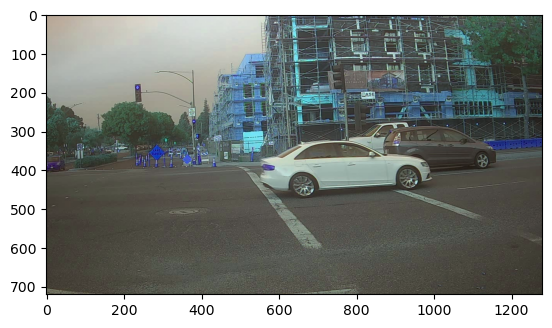

In [5]:
plt.imshow(img_test)

In [6]:
f = open("data/coco_classes.txt")

In [7]:
f

<_io.TextIOWrapper name='data/coco_classes.txt' mode='r' encoding='cp1252'>

In [8]:
f.readlines()[:5]

['person\n', 'bicycle\n', 'car\n', 'motorbike\n', 'aeroplane\n']

### define functions 

In [9]:
def image_preprocess(image):
    """
    this preprocess image in 416 x 416 picture for inputing network 

    arguments:
    image -- path of a image 

    returned:
    img_res_rescaled -- 416 x 416 image , rescaled and ready to be feed to darknet network 
    """

    #img = cv.imread(image)
    img_resized = cv.resize(image,[416,416])
    img_res_rescaled = img_resized / 255. 
    img_expand = np.expand_dims(img_res_rescaled , axis = 0)

    return  img_expand

In [10]:
def get_classes(file):
    """
    we use this foe only one perpose , for getting coco data set classes "data/coco_classes.txt"

    arguments:
    file -- path of the txt file with contain classes name in order for coco dataset 

    returns :
    classes_name -- their name as a list
    """
    with open(file) as f:
        lines = f.readlines()
        classes_name = [i.strip() for i in lines]

    return classes_name

In [11]:
# i test the both function and they wrok properly 

In [12]:
def  draw(image,boxes,scores,classes,all_classes):
    """
    draw function will draw a box over the object and write that objet's classes and scores 

    argument :
    image -- input image of network with we want to dectect object inside it 
    boxes -- predicted boxes by the network 
    scores -- 
    classes
    all_classes -- list of the all posible class for a object , this has  a special order 

    returns :
    _ 

    action :
    -change input image 
    - print score ,class , cordinate for each object inside the image  
    """

    for box , score , class_ in zip(boxes,scores,classes):
        x,y,w,h = box 
        # we want to create left_top and right_down corner foe our image 
        # beacuse we will use cv.rectangle model 
        x_lt = max(0,np.floor(x+0.5).astype(np.int32))# we use max beacuse we dont want our corner drop outside the picture and we use 0.5 threshold for accepting some prediction outside the picture
        y_lt = max(0,np.floor(y+0.5).astype(np.int32))
        x_rb = min(image.shape[1],np.floor(x+w+0.5).astype(np.int32))# like above we dont wnat prediction outside the image so use min and give 0.5 threshold for accepting 
        y_rb = min(image.shape[0],np.floor(y+h+0.5).astype(np.int32))

        cv.rectangle(image,(x_lt,y_lt),(x_rb,y_rb),[0,255,0],4)
        cv.putText(image,"{0} {1:.2f}".format(all_classes[int(class_)],score),(x_lt, y_lt - 6),cv.FONT_HERSHEY_SIMPLEX,1, (0, 255,255),3,cv.LINE_AA)
        print(f"class : {all_classes[int(class_)]} score : {score}")
        print(f"x,y,w,h = {w,y,w,h}")
        print()

    

In [13]:
def detect_image(image,yolo,all_classes):
    """
    this implement final detect on image 

    arguments:
    image -- image to be detected 
    yolo -- yolo object created by YOLO 
    all_classes -- list of all possible classes 

    returns:
    image -- draw image 

    """

    proper_img = image_preprocess(image)

    start = time.time()
    boxes ,  classes, scores = yolo.predict(proper_img,image.shape)
    end = time.time()

    print(f"time : {end-start}")

    if boxes is not None:
        draw(image,boxes,scores,classes,all_classes)
    return image 

In [14]:
yolo = YOLO(0.6,0.5)
file = "data/coco_classes.txt"
all_classes = get_classes(file)

In [15]:
for i in range(1,9):
    load_path = "images/" +str(i)+ ".jpg"
    save_path = "out/"+str(i)+".jpg"
    img = cv.imread(load_path)
    img_det = detect_image(img,yolo,all_classes)
    cv.imwrite(save_path , img_det)

1/1 [==============================] - 3s 3s/step
time : 2.658257246017456
class : car score : 0.9993331432342529
x,y,w,h = (449.1302446218637, 329.3347764015198, 449.1302446218637, 135.01187620254663)

class : car score : 0.9791455268859863
x,y,w,h = (342.1043117229755, 293.86112451553345, 342.1043117229755, 109.16036608127447)

1/1 [==============================] - 0s 324ms/step
time : 0.39870285987854004
class : truck score : 0.9584154486656189
x,y,w,h = (390.09639153113733, 292.5983190536499, 390.09639153113733, 115.73392496659206)

1/1 [==============================] - 0s 318ms/step
time : 0.3935978412628174
class : truck score : 0.9019860625267029
x,y,w,h = (410.30150413513184, 289.61726903915405, 410.30150413513184, 317.6402027331866)

1/1 [==============================] - 0s 349ms/step
time : 0.42491579055786133
class : truck score : 0.9746527075767517
x,y,w,h = (500.27917128342847, 288.6901044845581, 500.27917128342847, 160.56972466982327)

1/1 [============================

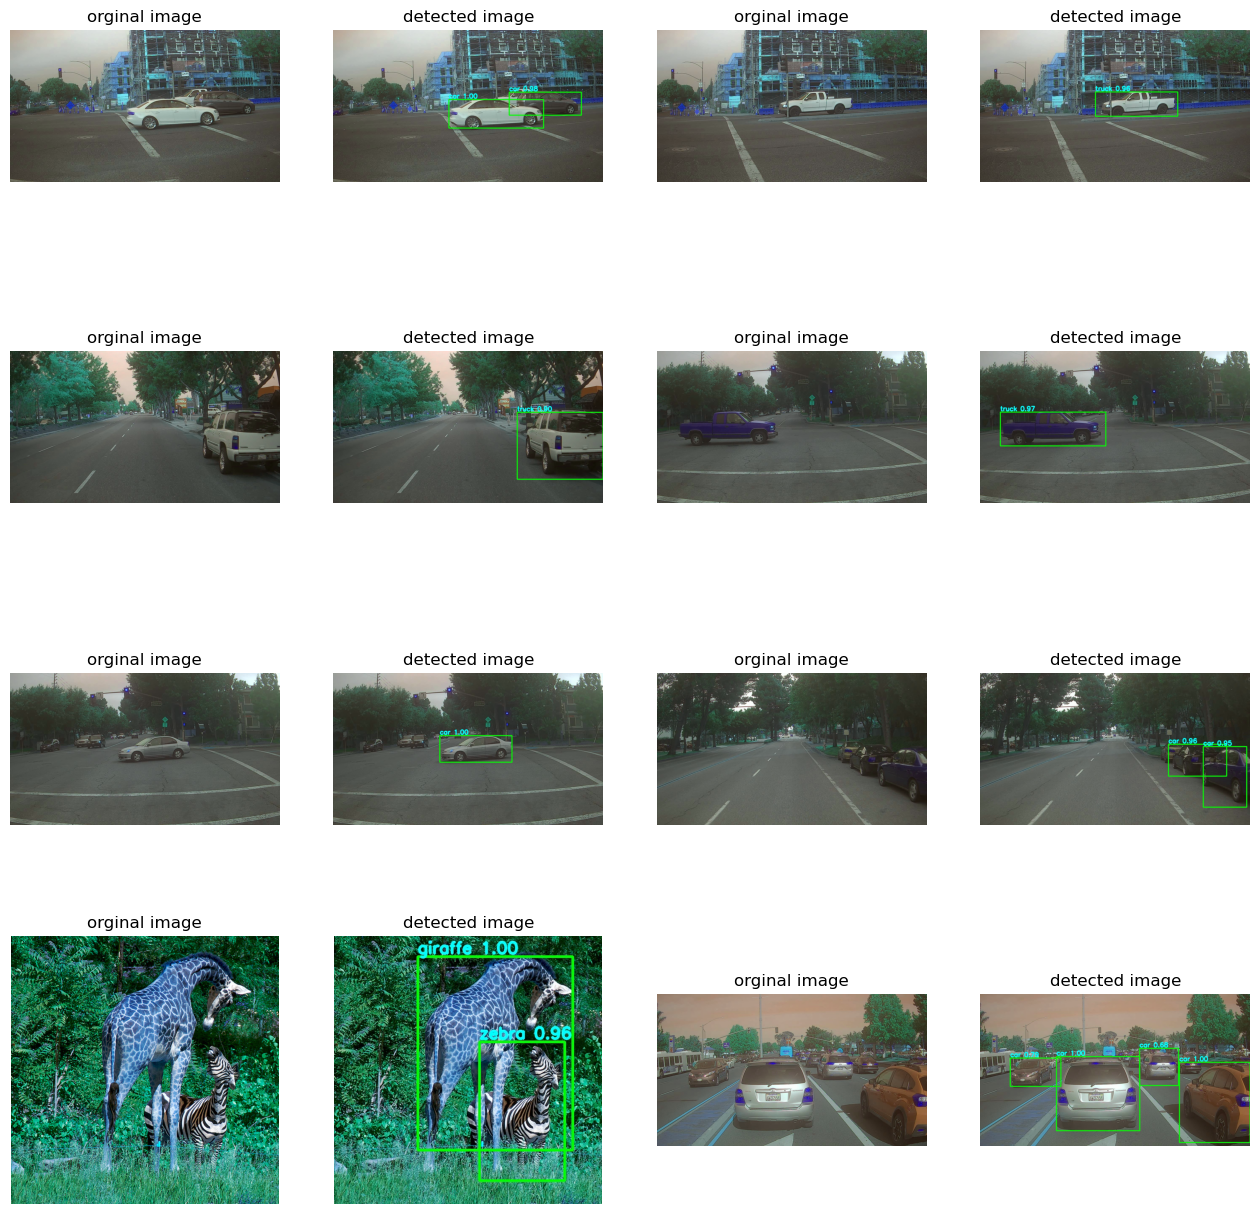

In [16]:
plt.figure(figsize=(16,16))
counter_1 = 1
counter_2 = 1 
for i in range(1,17):
    plt.subplot(4,4,i)
    if i%2 == 0:
        title = "detected image"
        img = cv.imread("out/" +str(counter_2)+ ".jpg")
        counter_2 +=1 
    else:
        title = "orginal image"
        img = cv.imread("images/" +str(counter_1)+ ".jpg")       
        counter_1 += 1 
    plt.title(title)
    plt.imshow(img)
    plt.axis("off")

1/1 [==============================] - 0s 355ms/step
time : 0.451707124710083
class : person score : 0.9663951396942139
x,y,w,h = (1162.5797587174636, 137.30083107948303, 1162.5797587174636, 575.380245401309)

class : cell phone score : 0.6308034658432007
x,y,w,h = (247.54074096679688, 168.4434449672699, 247.54074096679688, 486.5523063678008)



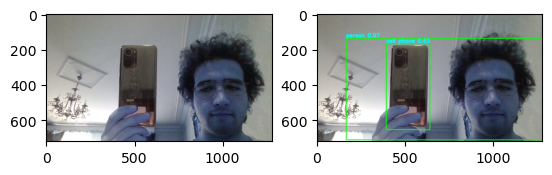

In [17]:
#"C:\Users\ARMA\Desktop\yolo\YOLOv3\images\product.jpg"
myself = cv.imread("images\product.jpg")
plt.subplot(1,2,1)
plt.imshow(myself)
myself_detected = detect_image(myself,yolo,all_classes)
plt.subplot(1,2,2)
plt.imshow(myself_detected)

# part 2 :use yolo video 

In [18]:
import numpy as np 
import cv2  
import os 

In [20]:
#def detect_video(video, yolo, all_classes):
video = "road_video.mp4"
video_path = os.path.join("images", video)
camera = cv2.VideoCapture(video_path)
cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)
# Prepare for saving the detected video
sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
  int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
vout = cv2.VideoWriter()
vout.open(os.path.join( "out", "road_video_detected_better_quality.mp4"), fourcc, 30, sz, 
True)
while True:
    res, frame = camera.read()
    if not res:
        break
    image = detect_image(frame, yolo, all_classes)
    #frame = cv2.flip(frame, 0)
    cv2.imshow("detection", image)
    # Save the video frame by frame
    vout.write(image)
    if cv2.waitKey(110) & 0xff == 27:
        break
vout.release()
camera.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 350ms/step
time : 0.45090270042419434
1/1 [==============================] - 0s 327ms/step
time : 0.4150817394256592
1/1 [==============================] - 0s 316ms/step
time : 0.4092113971710205
1/1 [==============================] - 0s 334ms/step
time : 0.4111149311065674
1/1 [==============================] - 0s 343ms/step
time : 0.41646456718444824
1/1 [==============================] - 0s 329ms/step
time : 0.415194034576416
1/1 [==============================] - 0s 326ms/step
time : 0.4145689010620117
1/1 [==============================] - 0s 319ms/step
time : 0.41265106201171875
1/1 [==============================] - 0s 321ms/step
time : 0.43022990226745605
1/1 [==============================] - 0s 355ms/step
time : 0.427337646484375
1/1 [==============================] - 0s 321ms/step
time : 0.41089487075805664
1/1 [==============================] - 0s 325ms/step
time : 0.3860456943511963
1/1 [==============================] - 0s 317ms/s